Insurance is policy that reduces the cost associated with decreasing returns brought on by various risk.In this dataset health insurance is given.This price is influenced by various factors.This is a project about Health Insurance Price Prediction using Machine Learning in Python in which I will extract some insights from a dataset that contains details about a person who is purchasing health insurance along with what health insurance price is charged to them using Machine Learning algorithmns in Python.


# Importing Python Libraries and dataset


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")


In [3]:
HI_data=pd.read_csv(r"C:\Users\palak\OneDrive\Documents\Data science\Machine Learning\Dataset\Health_insurance_cost.csv") # reading dataset
HI=HI_data.copy() #Creating new copy

In [4]:
HI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1310 non-null   float64
 1   gender                  1338 non-null   object 
 2   BMI                     1315 non-null   float64
 3   Children                1338 non-null   int64  
 4   smoking_status          1338 non-null   object 
 5   location                1338 non-null   object 
 6   health_insurance_price  1336 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB


In [5]:
HI.head() # exploring first five rows to identify anamolies in the data

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,NaN,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520


In [6]:
HI.describe() #statistical values

,age,BMI,Children,health_insurance_price
count,1310.000000,1315.000000,1338.000000,1336.000000
mean,39.166412,30.638217,1.094918,13268.527719
std,14.055378,6.110302,1.205493,12112.797724
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.210000,0.000000,4744.325050
50%,39.000000,30.305000,1.000000,9382.033000
75%,51.000000,34.580000,2.000000,16604.302645
max,64.000000,53.130000,5.000000,63770.428010


In [11]:
HI.columns

Index(['age', 'gender', 'BMI', 'Children', 'smoking_status', 'location',
       'health_insurance_price'],
      dtype='object')

In [9]:
HI.shape

(1338, 7)

### Dealing with missing values

In [12]:
HI.isnull().sum() # checking total number of missing values in each column

age                       28
gender                     0
BMI                       23
Children                   0
smoking_status             0
location                   0
health_insurance_price     2
dtype: int64

<Axes: >

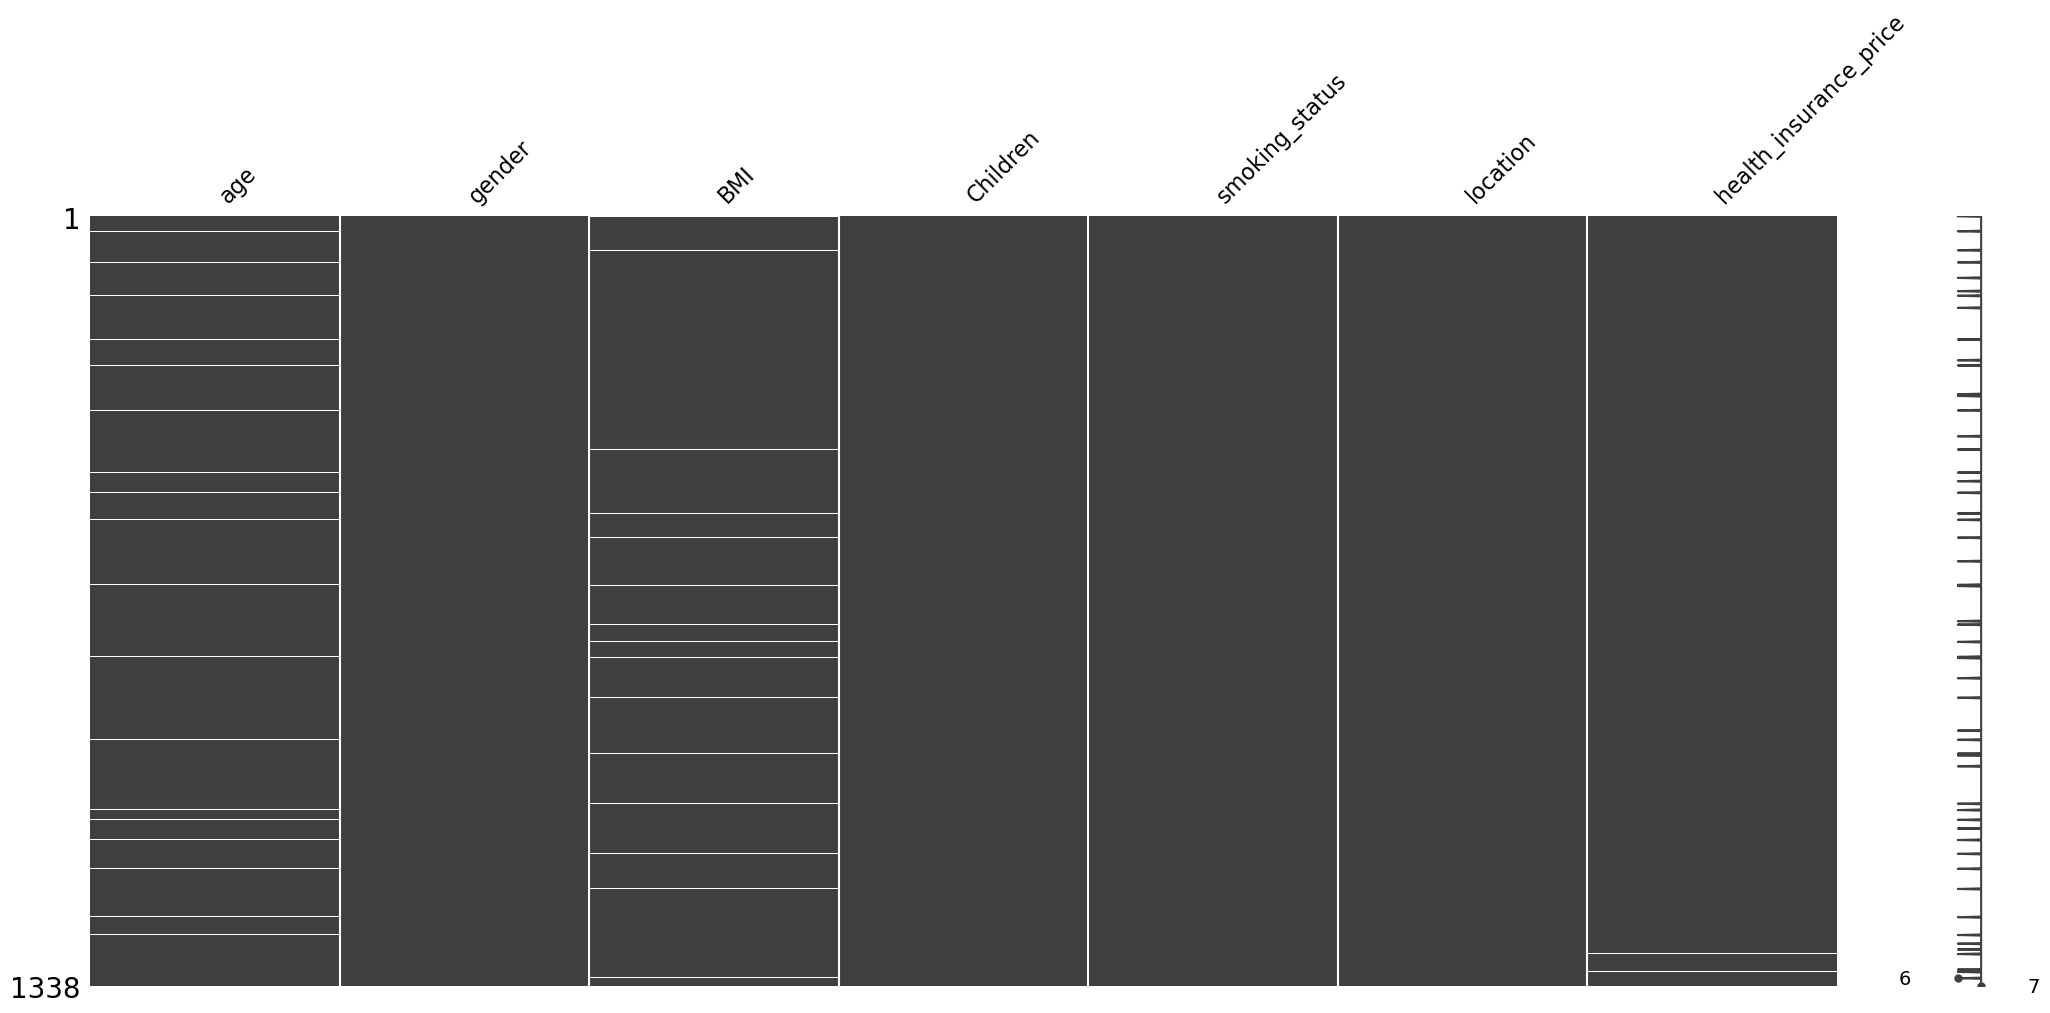

In [13]:
# visualization of missing values
# !pip install missingno
import missingno as msno
msno.matrix(HI)


From this graph we can observe that Age and BMI columns have so many missing values and health_insurance_price has 2 missing values.We can use mean or median to fill the values.

In [14]:
HI.columns


Index(['age', 'gender', 'BMI', 'Children', 'smoking_status', 'location',
       'health_insurance_price'],
      dtype='object')

In [16]:
HI["age"].fillna(HI["age"].median(),inplace=True)


In [17]:
HI["BMI"].fillna(HI["BMI"].median(),inplace=True)

In [18]:
HI["health_insurance_price"].fillna(HI["health_insurance_price"].median(),inplace=True)


In [19]:
HI.isnull().sum()

age                       0
gender                    0
BMI                       0
Children                  0
smoking_status            0
location                  0
health_insurance_price    0
dtype: int64

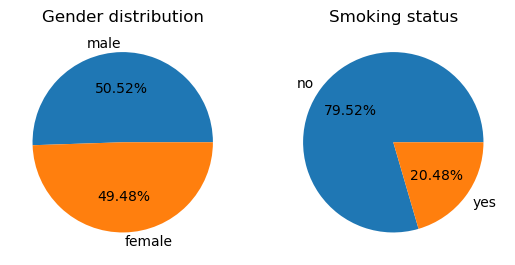

In [20]:
# Visualization in graphical form:

# Pie charts 
fig, axs = plt.subplots(1, 2) # subplot one row two columns

f1=HI["gender"].value_counts()
data=f1.values
lab=f1.index 
plt.subplot(1,2,1)
plt.pie(data,labels=lab,autopct='%1.2f%%')
plt.title("Gender distribution")

f2=HI['smoking_status'].value_counts()
data=f2.values
lab=f2.index
plt.subplot(1,2,2)
plt.pie(data,labels=lab,autopct='%1.2f%%')
plt.title("Smoking status")
plt.show()


Text(0.5, 1.0, 'Location count')

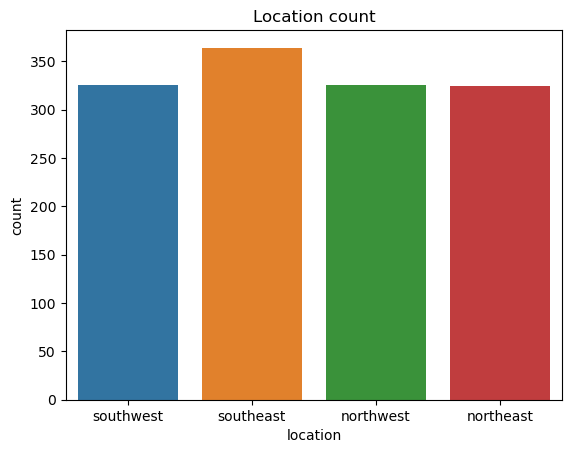

In [21]:
# count plot to visualize different location count
sns.countplot(x="location",data=HI)
f3=HI["location"].value_counts()
plt.title("Location count")


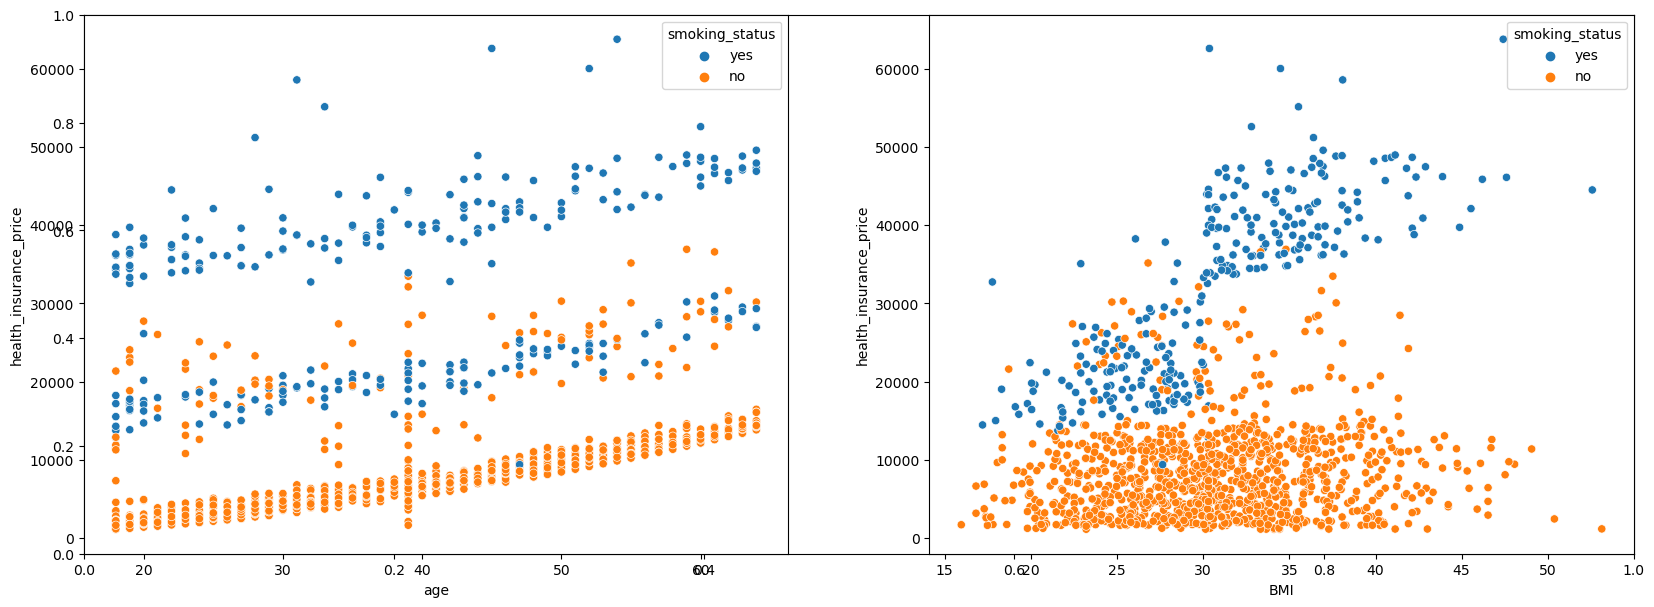

In [22]:
#Relationship of two variables age and BMI with health insurance price using scatter plot
features = ['age', 'BMI']
plt.subplots(figsize=(20, 7))
for i, col in enumerate(features):
    plt.subplot(1, 2, i + 1)
    sns.scatterplot(data=HI, x=col,y='health_insurance_price',hue="smoking_status")
plt.show()

# Dealing with outliers

In [20]:
# Visualize outliers using boxplot

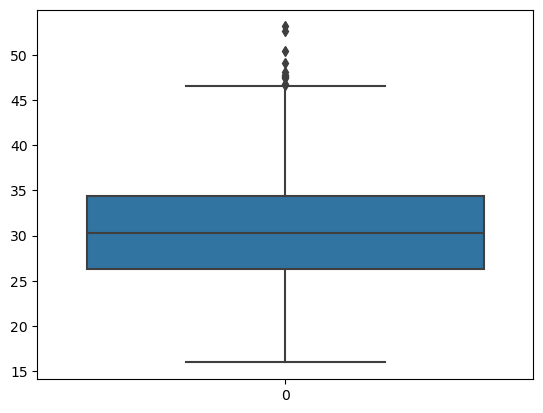

In [23]:
boxplot=sns.boxplot(HI["BMI"])

In [22]:
# BMI column has outliers that we need to treat.

In [24]:
Q1=HI['BMI'].quantile(0.25)
Q2=HI['BMI'].quantile(0.5)
Q3=HI['BMI'].quantile(0.75)
iqr=Q3-Q1
lowlim=Q1-1.5*iqr
upplim=Q3+1.5*iqr
print(lowlim)
print(upplim)


14.142500000000004
46.6025


In [25]:
#caping technique to replace outliers 

HI['BMI']=HI['BMI'].clip(lowlim,upplim)

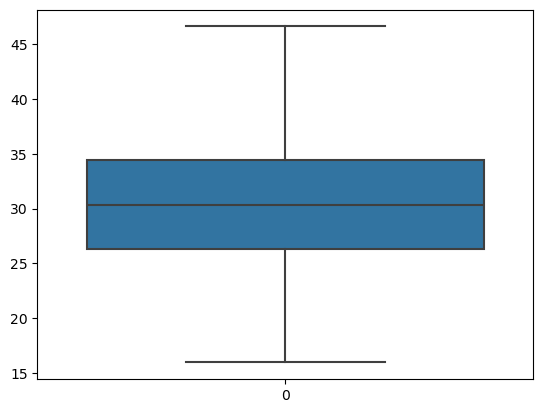

In [25]:
boxplot=sns.boxplot(HI["BMI"])

In [26]:
HI.columns


Index(['age', 'gender', 'BMI', 'Children', 'smoking_status', 'location',
       'health_insurance_price'],
      dtype='object')

# Encoding
encoding is to be done for discrete categorical data

In [26]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [27]:
HI["gender"]=lb.fit_transform(HI["gender"])
HI["smoking_status"]=lb.fit_transform(HI["smoking_status"])
HI['location']=HI['location'].map({'northwest':0, 'northeast':1,'southeast':2,'southwest':3})


In [28]:
HI.head(2)

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,0,30.305,0,1,3,16884.9240
1,18.0,1,33.770,1,0,2,1725.5523


In [29]:
data = pd.DataFrame(HI) # checking correlation between variables
print(data.corr(method = 'spearman'))

                             age    gender       BMI  Children  \
age                     1.000000 -0.017238  0.106193  0.056051   
gender                 -0.017238  1.000000  0.044448  0.015589   
BMI                     0.106193  0.044448  1.000000  0.011822   
Children                0.056051  0.015589  0.011822  1.000000   
smoking_status         -0.021568  0.076185  0.001160  0.016583   
location                0.009381  0.007856  0.146562 -0.011770   
health_insurance_price  0.527312  0.011020  0.118501  0.132324   

                        smoking_status  location  health_insurance_price  
age                          -0.021568  0.009381                0.527312  
gender                        0.076185  0.007856                0.011020  
BMI                           0.001160  0.146562                0.118501  
Children                      0.016583 -0.011770                0.132324  
smoking_status                1.000000  0.012622                0.661736  
location             

In [30]:
# Examine multicollinearity using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# the independent variables set
X_vif = HI.drop(['health_insurance_price'], axis=1)

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns
 
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i)
                          for i in range(len(X_vif.columns))]

print(vif_data)

          feature        VIF
0             age   7.699750
1          gender   2.002388
2             BMI  10.458863
3        Children   1.799357
4  smoking_status   1.257473
5        location   2.917785


# Model Development:



In [64]:
#Initializing dependent and independent variables
X=HI.drop(["health_insurance_price"],axis=1)
Y=HI[['health_insurance_price']]


In [65]:
# splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42)

In [90]:
# performing transformation of data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)


In [91]:
X_test=sc.transform(X_test)


In [35]:
# importing cost function libraries
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression



# Linear Regression

In [56]:
# fitting linear regression model
ln = LinearRegression()
ln.fit(X_train,y_train)
print(ln.score(X_train,y_train))
print(ln.score(X_test,y_test))
print(cross_val_score(ln,X,Y,cv=5,).mean())
print('Coefficients: ', ln.coef_)# regression coefficients

0.7366927174504134
0.7577069746556258


<IPython.core.display.Javascript object>

0.7390724297288152
Coefficients:  [[3562.87640507   42.72217923 1988.95326364  513.61301605 9492.45812793
  -240.41300005]]


In [57]:
# fitting model into test data
y_pred = ln.predict(X_train)
y_pred_test = ln.predict(X_test)

In [58]:
# calculating error
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_test))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

<IPython.core.display.Javascript object>

MAE: 4319.500208296015


<IPython.core.display.Javascript object>

MSE: 36515528.740963794


<IPython.core.display.Javascript object>

RMSE: 6042.808017880743


In [49]:
# calculting rsquared value
r2 = r2_score(y_true=y_train,y_pred=y_pred)
print(r2)


0.7366927174504134


From linear model observations :
r2 score=0.7366927174504134
Cross validation score=0.7390724297288152
RMSE: 6042.808017880743

# XGBoost


In [62]:
from xgboost import XGBRegressor

In [39]:
# XGBoost regressor object by calling the XGBRegressor() class from
# the XGBoost library with the hyper-parameters passed as arguments.
from sklearn.model_selection import GridSearchCV
# param_grid = {"metric":['minkowski','euclidean'],"n_neighbors" :[3,5,7]}
# model = KNeighborsClassifier()
# GS = GridSearchCV(estimator=model,param_grid=param_grid)
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
max_depth = 5, alpha = 10, n_estimators = 10)

<IPython.core.display.Javascript object>

In [69]:
#Fit the regressor to the training set and make predictions on the test set using the familiar .fit() and .predict() methods

xg=XGBRegressor()
xg.fit(X_train,y_train)
ypred=xg.predict(X_train)
ypred_test=xg.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, ypred_test))
print('MSE:', metrics.mean_squared_error(y_test, ypred_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, ypred_test)))
print('R2 score:',r2_score(y_train,ypred))
print('Cross validation score:',cross_val_score(xg,X,Y,cv=5,).mean())


<IPython.core.display.Javascript object>

MAE: 2951.738798902478


<IPython.core.display.Javascript object>

MSE: 26078385.6812739


<IPython.core.display.Javascript object>

RMSE: 5106.700077474093
R2 score: 0.9940374617689876


<IPython.core.display.Javascript object>

Cross validation score: 0.792573423345827


Hyper parameter tuning

from sklearn.model_selection import GridSearchCV
estimator=XGBRegressor()
param_grid={'n_estimators':[10,15,20,40,50],'max_depth':[3,4,5],'gamma':[0,0.15,0.3,0.5,1]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(X_train,y_train)
print(grid.best_params_)


In [76]:
xgmodel=XGBRegressor(n_estimators=10,max_depth=3,gamma=0)
xgmodel.fit(X_train,y_train)
y_pred=xgmodel.predict(X_train)
y_predtest=xgmodel.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, y_predtest))
print('MSE:', metrics.mean_squared_error(y_test, y_predtest))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predtest)))
print('R2 score:',r2_score(y_train,y_pred))
print('Cross validation score:',cross_val_score(xgmodel,X,Y,cv=5,).mean())


<IPython.core.display.Javascript object>

MAE: 2749.1782647605414


<IPython.core.display.Javascript object>

MSE: 21596610.839172803


<IPython.core.display.Javascript object>

RMSE: 4647.215385494071
R2 score: 0.8660666792644669


<IPython.core.display.Javascript object>

Cross validation score: 0.849544832916672


From XGBoost model ,I can conclude that
R2 score during training:0.9940374617689876
Cross validation score:  0.792573423345827
RMSE: 5106.700077474093
It seems overfitting so I apply Hyper parameter tuning
After Hyper parameter tuning
RMSE: 4647.215385494071
R2 score: 0.8660666792644669
Cross validation score: 0.849544832916672

## Random forest regression

In [85]:
# Importing library
from sklearn.ensemble import RandomForestRegressor

 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 42)

# fit the regressor with x and y data
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [86]:
# performing prediction
y_pred = regressor.predict(X_train)
y_pred_test = regressor.predict(X_test)


In [87]:
# calculating error
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_test))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
print('R2 score:',r2_score(y_train,y_pred))
print('Cross validation score:',cross_val_score(regressor,X,Y,cv=5,).mean())


<IPython.core.display.Javascript object>

MAE: 2763.1219618274376


<IPython.core.display.Javascript object>

MSE: 24780494.580608048


<IPython.core.display.Javascript object>

RMSE: 4978.001062736734
R2 score: 0.9745813838830695


<IPython.core.display.Javascript object>

Cross validation score: 0.82198074221802


In [88]:
#Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
estimator=RandomForestRegressor(random_state=42)
param_grid={'n_estimators':[10,40,50,98,100,120,150]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(X_train,y_train)
print(grid.best_params_)

{'n_estimators': 150}


In [89]:
reg = RandomForestRegressor(n_estimators = 150, random_state = 42)
# fit the regressor with x and y data
reg.fit(X_train, y_train)
# performing prediction
y_pred = reg.predict(X_train)
y_pred_test = reg.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_test))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
print('R2 score:',r2_score(y_train,y_pred))
print('Cross validation score:',cross_val_score(reg,X,Y,cv=5,).mean())


<IPython.core.display.Javascript object>

MAE: 2726.9325992204826


<IPython.core.display.Javascript object>

MSE: 24352678.462469492


<IPython.core.display.Javascript object>

RMSE: 4934.8433067798105
R2 score: 0.9749693461774018


<IPython.core.display.Javascript object>

Cross validation score: 0.8220389399284237


From Random forest regressor model conclusion 
There is no much difference after applying hyperparameter tuning.
after hyperparameter tuning 
RMSE: 4934.8433067798105
R2 score: 0.9749693461774018
Cross validation score: 0.8220389399284237

## Support vector regression

In [59]:
# Importing SVR library and creating model
from sklearn.svm import SVR
model = SVR(kernel = 'rbf')
model.fit(X_train, y_train)

SVR()

In [60]:
y_pred = regressor.predict(X_train) # prediciting y
y_pred_test = regressor.predict(X_test) # prediciting y

In [61]:
# Calculating error
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_test))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
print('R2 score:',r2_score(y_train,y_pred))
print('Cross validation score:',cross_val_score(model,X,Y,cv=5,).mean())


<IPython.core.display.Javascript object>

MAE: 8459.847370945849


<IPython.core.display.Javascript object>

MSE: 164647902.0951515


<IPython.core.display.Javascript object>

RMSE: 12831.519866919565
R2 score: -0.09429229464103939


<IPython.core.display.Javascript object>

Cross validation score: -0.1030351176017835


From SVR model I can conclude that 
R2 score during training=-0.09429229464103939
Cross validation score=-0.1030351176017835
RMSE: 12831.519866919565

Conclusion:

I have applied 4 models out of which XGBoost model is giving the best result after comparing RMSE,Cross validation score, R2 score this means predictions made by this model are close to the real values as compared to the other model.So this model is good for given dataset of health insurance.


